##  Topic Extraction - Extract the topics from the texts with the help of NMF (Non-negative Matrix Factorization method).

It involves decomposing a matrix of term-frequency or TF-IDF (Term Frequency-Inverse Document Frequency) values into two lower-dimensional matrices: one representing the topics and the other representing the weights of terms in those topics.

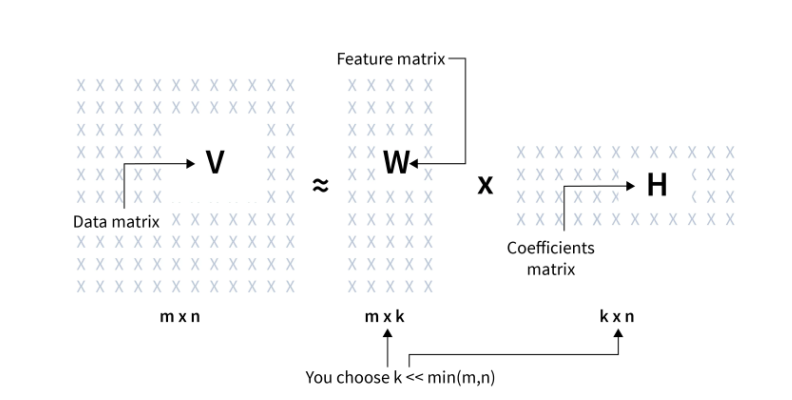

NMF is an unsupervised feature extraction algorithm for factorizing a data matrix subject to constraints where the resulting factors possess different but useful representational properties.

The central principle in Non-negative matrix factorization is that given a non-negative matrix V, we shall find non-negative matrix factors W and H such that V ≈ W*H.

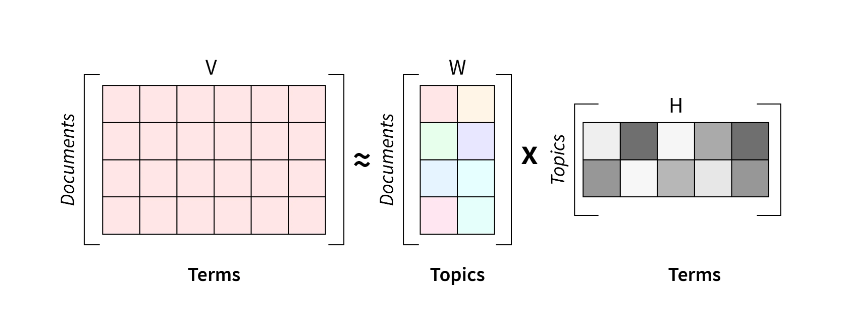

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
def extract_topics(texts, num_topics=5):
    # Create TF-IDF vectorizer
    # control the document frequency threshold for terms. (max_df, min_df)
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    
    # Fit transform the text data
    tfidf = tfidf_vectorizer.fit_transform(texts)
    
    # Fit NMF model
    # NMF is a dimensionality reduction technique used for topic modeling. 
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf)
    
    # Get the feature names (terms)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Get topics and their top words
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-10 - 1:-1]  # Get indices of top 10 words
        top_words = [feature_names[i] for i in top_words_idx]  # Get top words
        topics.append({"Topic": topic_idx, "Top Words": top_words})
    
    return topics

In [3]:
# Sample texts
texts = [
    "Machine learning is a subset of artificial intelligence. It focuses on the development of computer programs that can access data and use it to learn for themselves.",
    "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language.",
    "Deep learning is a subset of machine learning, which is a subset of artificial intelligence. It concerns the development of neural networks with many layers.",
    "Reinforcement learning is an area of machine learning where an agent learns to behave in an environment by performing actions and receiving rewards.",
    "Computer vision is an interdisciplinary field that deals with how computers can be made to gain understanding from digital images or videos."
]


In [4]:
# Extract topics
topics = extract_topics(texts)

In [5]:
# Print topics and their top words
for topic in topics:
    print("Topic {}: {}".format(topic["Topic"], ", ".join(topic["Top Words"])))

Topic 0: subset, development, learning, intelligence, artificial, machine, computers, computer
Topic 1: computers, computer, subset, machine, learning, intelligence, development, artificial
Topic 2: learning, machine, intelligence, artificial, subset, development, computers, computer
Topic 3: intelligence, artificial, computer, computers, subset, machine, learning, development
Topic 4: computer, development, machine, subset, intelligence, artificial, learning, computers
